# Deep Gaussian Processes
### [Neil D. Lawrence](http://inverseprobability.com), Amazon Cambridge and University of Sheffield
### 2019-01-11

**Abstract**: Classical machine learning and statistical approaches to learning, such
as neural networks and linear regression, assume a parametric form for
functions. Gaussian process models are an alternative approach that
assumes a probabilistic prior over functions. This brings benefits, in
that uncertainty of function estimation is sustained throughout
inference, and some challenges: algorithms for fitting Gaussian
processes tend to be more complex than parametric models. In these
sessions I will introduce Gaussian processes and explain why sustaining
uncertainty is important. We’ll then look at some extensions of Gaussian
process models, in particular composition of Gaussian processes, or deep
Gaussian processes.

$$
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
% Already defined by latex
%\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
% Already defined by latex
%\newcommand{\vec}{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!-- Enables links to pages-->
<!--ipynb-->

<!-- ipynb and slides-->

### 

<div style="text-align:center">

<img class="vertical-align:middle" src="../slides/diagrams/Planck_CMB.png" width="50%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

### 

<div style="fontsize:120px;vertical-align:middle">

<img src="../slides/diagrams/earth_PNG37.png" width="20%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$=f\Bigg($<img src="../slides/diagrams/Planck_CMB.png"  width="50%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$\Bigg)$

</div>

### Deep Gaussian Processes

### Approximations

<div style="text-align:center">

<img class="" src="../slides/diagrams/sparse-gps-1.png" width="90%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<i>Image credit: Kai Arulkumaran</i>
</center>
### Approximations

<div style="text-align:center">

<img class="" src="../slides/diagrams/sparse-gps-2.png" width="90%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<i>Image credit: Kai Arulkumaran</i>
</center>
### Approximations

<div style="text-align:center">

<img class="" src="../slides/diagrams/sparse-gps-3.png" width="45%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<i>Image credit: Kai Arulkumaran</i>
</center>
### Approximations

<div style="text-align:center">

<img class="" src="../slides/diagrams/sparse-gps-4.png" width="45%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<i>Image credit: Kai Arulkumaran</i>
</center>

In [3]:
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot 
from gp_tutorial import gpplot

NameError: name 'm_full' is not defined

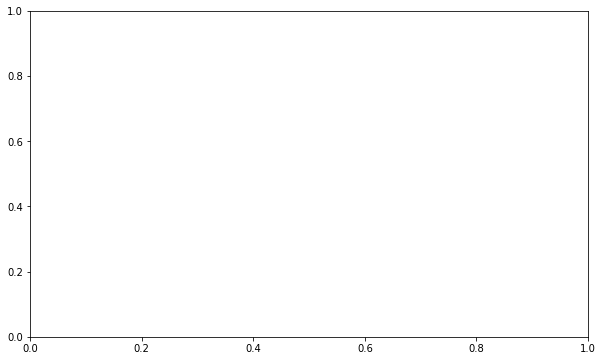

In [4]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-full-gp.svg', 
                  transparent=True, frameon=True)

### Full Gaussian Process Fit

<img src="../slides/diagrams/gp/sparse-demo-full-gp.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg', 
                  transparent=True, frameon=True)

### Inducing Variable Fit

<img src="../slides/diagrams/gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-constrained-inducing-6-learned-gp.svg', 
                  transparent=True, frameon=True)

### Inducing Variable Param Optimize

<img src="../slides/diagrams/gp/sparse-demo-constrained-inducing-6-learned-gp.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2,xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-unconstrained-inducing-6-gp.svg', 
                  transparent=True, frameon=True)

### Inducing Variable Full Optimize

<img src="../slides/diagrams/gp/sparse-demo-unconstrained-inducing-6-gp.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-sparse-inducing-8-gp.svg', 
                  transparent=True, frameon=True)

### Eight Optimized Inducing Variables

<img src="../slides/diagrams/gp/sparse-demo-sparse-inducing-8-gp.svg" class="" align="" style="">

### Full Gaussian Process Fit

<img src="../slides/diagrams/gp/sparse-demo-full-gp.svg" class="" align="" style="">

### Leads to Other Approximations ...

-   Let’s be explicity about storing approximate posterior of
    $\inducingVector$, $q(\inducingVector)$.
-   Now we have
    $$p(\dataVector^*|\dataVector) = \int p(\dataVector^*| \inducingVector) q(\inducingVector | \dataVector) \text{d} \inducingVector$$

### Leads to Other Approximations ...

-   Inducing variables look a lot like regular parameters.
-   *But*: their dimensionality does not need to be set at design time.
-   They can be modified arbitrarily at run time without effecting the
    model likelihood.
-   They only effect the quality of compression and the lower bound.

### In GPs for Big Data

-   Exploit the resulting factorization ...
    $$p(\dataVector^*|\dataVector) = \int p(\dataVector^*| \inducingVector) q(\inducingVector | \dataVector) \text{d} \inducingVector$$
    \pause
-   The distribution now *factorizes*:
    $$p(\dataVector^*|\dataVector) = \int \prod_{i=1}^{\numData^*}p(\dataScalar^*_i| \inducingVector) q(\inducingVector | \dataVector) \text{d} \inducingVector$$
-   This factorization can be exploited for stochastic variational
    inference [@Hoffman:stochastic12].

### Nonparametrics for Very Large Data Sets

<center>
Modern data availability
</center>
<div style="text-align:center">

<img class="negate" src="../slides/diagrams/ml/house_price_country.png" width="60%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

### Nonparametrics for Very Large Data Sets

<center>
Proxy for index of deprivation?
</center>
<div style="text-align:center">

<img class="negate" src="../slides/diagrams/ml/house_price_peak_district.png" width="60%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

### Nonparametrics for Very Large Data Sets

<center>
Actually index of deprivation is a proxy for this ...
</center>
<div style="text-align:center">

<img class="negate" src="../slides/diagrams/ml/house_price_peak_district.png" width="60%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

### 

\catdoc
<img class="" src="../slides/diagrams/people/2013_03_28_180606.JPG" width="1cm" align="" style="background:none; border:none; box-shadow:none; position:absolute; clip:rect(100px,2369px,2200px,1370px)">
<table>
<tr>
<td width>
[[@Hensman:bigdata13]]{style="text-align:left"}
</td>
<td width>
[<img class="" src="../slides/diagrams/people/2013_03_28_180606.JPG" width="1.5cm" align="" style="background:none; border:none; box-shadow:none; position:absolute; clip:rect(100px,2369px,2200px,1370px)">]{style="text-align:right"}
</td>
</tr>
</table>
<div style="text-align:center">

<img class="" src="../slides/diagrams/health/244_1_clip.png" width="90%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<http://auai.org/uai2013/prints/papers/244.pdf>
</center>
### 

<table>
<tr>
<td width>
[[@Hensman:bigdata13]]{style="text-align:left"}
</td>
<td width>
[<img class="" src="../slides/diagrams/people/2013_03_28_180606.JPG" width="1.5cm" align="" style="background:none; border:none; box-shadow:none; position:absolute; clip:rect(100px,2369px,2200px,1370px)">]{style="text-align:right"}
</td>
</tr>
</table>
<div style="text-align:center">

<img class="" src="../slides/diagrams/health/244_6_clip.png" width="90%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<http://auai.org/uai2013/prints/papers/244.pdf>
</center>
### Modern Review

-   *A Unifying Framework for Gaussian Process Pseudo-Point
    Approximations using Power Expectation Propagation*
    @Thang:unifying17

-   *Deep Gaussian Processes and Variational Propagation of Uncertainty*
    @Damianou:thesis2015

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-gaussian-processes.md">\_deepgp/includes/deep-gaussian-processes.md</a>

<a href="file:///Users/neil/lawrennd/talks/_gp/includes/mackay-bathwater.md">\_gp/includes/mackay-bathwater.md</a>

### 

<div style="text-align:center">

<img class="" src="../slides/diagrams/gp/mackay-baby.png" width="" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

### Structure of Priors

MacKay: NeurIPS Tutorial 1997 “Have we thrown out the baby with the
bathwater?” [Published as @MacKay:gpintroduction98]}

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-nn-gp.md">\_deepgp/includes/deep-nn-gp.md</a>

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-nn.md">\_deepgp/includes/deep-nn.md</a>

In [ ]:
plot.deep_nn(diagrams='../slides/diagrams/deepgp/')

### Deep Neural Network

<img src="../slides/diagrams/deepgp/deep-nn1.svg" class="" align="" style="">

### Deep Neural Network

<img src="../slides/diagrams/deepgp/deep-nn2.svg" class="" align="" style="">

### Mathematically

$$
\begin{align}
    \hiddenVector_{1} &= \basisFunction\left(\mappingMatrix_1 \inputVector\right)\\
    \hiddenVector_{2} &=  \basisFunction\left(\mappingMatrix_2\hiddenVector_{1}\right)\\
    \hiddenVector_{3} &= \basisFunction\left(\mappingMatrix_3 \hiddenVector_{2}\right)\\
    \dataVector &= \mappingVector_4 ^\top\hiddenVector_{3}
\end{align}
$$

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/overfitting-low-rank.md">\_deepgp/includes/overfitting-low-rank.md</a>

### Overfitting

-   Potential problem: if number of nodes in two adjacent layers is big,
    corresponding $\mappingMatrix$ is also very big and there is the
    potential to overfit.

-   Proposed solution: “dropout”.

-   Alternative solution: parameterize $\mappingMatrix$ with its SVD. $$
      \mappingMatrix = \eigenvectorMatrix\eigenvalueMatrix\eigenvectwoMatrix^\top
      $$ or $$
      \mappingMatrix = \eigenvectorMatrix\eigenvectwoMatrix^\top
      $$ where if $\mappingMatrix \in \Re^{k_1\times k_2}$ then
    $\eigenvectorMatrix\in \Re^{k_1\times q}$ and
    $\eigenvectwoMatrix \in \Re^{k_2\times q}$, i.e. we have a low rank
    matrix factorization for the weights.

In [ ]:
plot.low_rank_approximation(diagrams='../slides/diagrams')

### Low Rank Approximation

<img src="../slides/diagrams/wisuvt.svg" class="" align="" style="">
<center>
<i>Pictorial representation of the low rank form of the matrix
$\mappingMatrix$</i>
</center>
<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-gp.md">\_deepgp/includes/deep-gp.md</a>

In [ ]:
plot.deep_nn_bottleneck(diagrams='../slides/diagrams/deepgp')

### Deep Neural Network

<img src="../slides/diagrams/deepgp/deep-nn-bottleneck1.svg" class="" align="" style="">

### Deep Neural Network

<img src="../slides/diagrams/deepgp/deep-nn-bottleneck2.svg" class="" align="" style="">

### Mathematically

The network can now be written mathematically as $$
\begin{align}
  \latentVector_{1} &= \eigenvectwoMatrix^\top_1 \inputVector\\
  \hiddenVector_{1} &= \basisFunction\left(\eigenvectorMatrix_1 \latentVector_{1}\right)\\
  \latentVector_{2} &= \eigenvectwoMatrix^\top_2 \hiddenVector_{1}\\
  \hiddenVector_{2} &= \basisFunction\left(\eigenvectorMatrix_2 \latentVector_{2}\right)\\
  \latentVector_{3} &= \eigenvectwoMatrix^\top_3 \hiddenVector_{2}\\
  \hiddenVector_{3} &= \basisFunction\left(\eigenvectorMatrix_3 \latentVector_{3}\right)\\
  \dataVector &= \mappingVector_4^\top\hiddenVector_{3}.
\end{align}
$$

### A Cascade of Neural Networks

$$
\begin{align}
  \latentVector_{1} &= \eigenvectwoMatrix^\top_1 \inputVector\\
  \latentVector_{2} &= \eigenvectwoMatrix^\top_2 \basisFunction\left(\eigenvectorMatrix_1 \latentVector_{1}\right)\\
  \latentVector_{3} &= \eigenvectwoMatrix^\top_3 \basisFunction\left(\eigenvectorMatrix_2 \latentVector_{2}\right)\\
  \dataVector &= \mappingVector_4 ^\top \latentVector_{3}
\end{align}
$$

### Cascade of Gaussian Processes

-   Replace each neural network with a Gaussian process $$
    \begin{align}
      \latentVector_{1} &= \mappingFunctionVector_1\left(\inputVector\right)\\
      \latentVector_{2} &= \mappingFunctionVector_2\left(\latentVector_{1}\right)\\
      \latentVector_{3} &= \mappingFunctionVector_3\left(\latentVector_{2}\right)\\
      \dataVector &= \mappingFunctionVector_4\left(\latentVector_{3}\right)
    \end{align}
    $$

-   Equivalent to prior over parameters, take width of each layer to
    infinity.

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-theory.md">\_deepgp/includes/deep-theory.md</a>

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/process-composition.md">\_deepgp/includes/process-composition.md</a>

### Mathematically

-   Composite *multivariate* function

$$
  \mathbf{g}(\inputVector)=\mappingFunctionVector_5(\mappingFunctionVector_4(\mappingFunctionVector_3(\mappingFunctionVector_2(\mappingFunctionVector_1(\inputVector))))).
  $$

In [ ]:
pgm = plot.horizontal_chain(depth=5)
pgm.render().figure.savefig("../slides/diagrams/deepgp/deep-markov.svg", transparent=True)

### Equivalent to Markov Chain

-   Composite *multivariate* function $$
      p(\dataVector|\inputVector)= p(\dataVector|\mappingFunctionVector_5)p(\mappingFunctionVector_5|\mappingFunctionVector_4)p(\mappingFunctionVector_4|\mappingFunctionVector_3)p(\mappingFunctionVector_3|\mappingFunctionVector_2)p(\mappingFunctionVector_2|\mappingFunctionVector_1)p(\mappingFunctionVector_1|\inputVector)
      $$

<img src="../slides/diagrams/deepgp/deep-markov.svg" class="" align="" style="">

In [ ]:
pgm = plot.vertical_chain(depth=5)
pgm.render().figure.savefig("../slides/diagrams/deepgp/deep-markov-vertical.svg", transparent=True)

### 

<img src="../slides/diagrams/deepgp/deep-markov-vertical.svg" class="" align="" style="">

### Why Deep?

-   Gaussian processes give priors over functions.

-   Elegant properties:
-   e.g. *Derivatives* of process are also Gaussian distributed (if they
    exist).

-   For particular covariance functions they are ‘universal
    approximators’, i.e. all functions can have support under the prior.

-   Gaussian derivatives might ring alarm bells.

-   E.g. a priori they don’t believe in function ‘jumps’.

### Stochastic Process Composition

-   From a process perspective: *process composition*.

-   A (new?) way of constructing more complex *processes* based on
    simpler components.

### 

<img src="../slides/diagrams/deepgp/deep-markov-vertical.svg" class="" align="" style="">

In [ ]:
pgm = plot.vertical_chain(depth=5, shape=[2, 7])
pgm.add_node(daft.Node('y_2', r'$\mathbf{y}_2$', 1.5, 3.5, observed=True))
pgm.add_edge('f_2', 'y_2')
pgm.render().figure.savefig("../slides/diagrams/deepgp/deep-markov-vertical-side.svg", transparent=True)

### 

<img src="../slides/diagrams/deepgp/deep-markov-vertical-side.svg" class="" align="" style="">

In [ ]:
import teaching_plots as plot

In [ ]:
plot.non_linear_difficulty_plot_3(diagrams='../../slides/diagrams/dimred/')

### Difficulty for Probabilistic Approaches

-   Propagate a probability distribution through a non-linear mapping.

-   Normalisation of distribution becomes intractable.

<img src="../slides/diagrams/dimred/nonlinear-mapping-3d-plot.svg" class="" align="center" style="">

In [ ]:
plot.non_linear_difficulty_plot_2(diagrams='../../slides/diagrams/dimred/')

### Difficulty for Probabilistic Approaches

-   Propagate a probability distribution through a non-linear mapping.

-   Normalisation of distribution becomes intractable.

<img src="../slides/diagrams/dimred/nonlinear-mapping-2d-plot.svg" class="" align="center" style="">

In [ ]:
plot.non_linear_difficulty_plot_1(diagrams='../../slides/diagrams/dimred')

### Difficulty for Probabilistic Approaches

-   Propagate a probability distribution through a non-linear mapping.

-   Normalisation of distribution becomes intractable.

<img src="../slides/diagrams/dimred/gaussian-through-nonlinear.svg" class="" align="center" style="">

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/stack-gp-intro.md">\_deepgp/includes/stack-gp-intro.md</a>

### Deep Gaussian Processes

-   Deep architectures allow abstraction of features
    [@Bengio:deep09; @Hinton:fast06; @Salakhutdinov:quantitative08]
-   We use variational approach to stack GP models.

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/stacked-pca.md">\_deepgp/includes/stacked-pca.md</a>

In [ ]:
import teaching_plots as plot

In [ ]:
plot.stack_gp_sample(kernel=GPy.kern.Linear,
                     diagrams="../../slides/diagrams/deepgp")

In [ ]:
import pods

In [ ]:
pods.notebook.display_plots('stack-gp-sample-Linear-{sample:0>1}.svg', 
                            directory='../../slides/diagrams/deepgp', sample=(0,4))

### Stacked PCA

<script>
showDivs(0, 'stack-pca-sample');
</script>
<small></small>
<input id="range-stack-pca-sample" type="range" min="0" max="4" value="0" onchange="setDivs('stack-pca-sample')" oninput="setDivs('stack-pca-sample')">
<button onclick="plusDivs(-1, 'stack-pca-sample')">
❮
</button>
<button onclick="plusDivs(1, 'stack-pca-sample')">
❯
</button>
<div class="stack-pca-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-pca-sample-0.svg" class="" align="" style="">

</div>

<div class="stack-pca-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-pca-sample-1.svg" class="" align="" style="">

</div>

<div class="stack-pca-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-pca-sample-2.svg" class="" align="" style="">

</div>

<div class="stack-pca-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-pca-sample-3.svg" class="" align="" style="">

</div>

<div class="stack-pca-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-pca-sample-4.svg" class="" align="" style="">

</div>

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/stacked-gp.md">\_deepgp/includes/stacked-gp.md</a>

### Stacked GP

In [ ]:
plot.stack_gp_sample(kernel=GPy.kern.RBF,
                     diagrams="../../slides/diagrams/deepgp")

In [ ]:
pods.notebook.display_plots('stack-gp-sample-RBF-{sample:0>1}.svg', 
                            directory='../../slides/diagrams/deepgp', sample=(0,4))

<script>
showDivs(0, 'stack-gp-sample');
</script>
<small></small>
<input id="range-stack-gp-sample" type="range" min="0" max="4" value="0" onchange="setDivs('stack-gp-sample')" oninput="setDivs('stack-gp-sample')">
<button onclick="plusDivs(-1, 'stack-gp-sample')">
❮
</button>
<button onclick="plusDivs(1, 'stack-gp-sample')">
❯
</button>
<div class="stack-gp-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-gp-sample-0.svg" class="" align="" style="">

</div>

<div class="stack-gp-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-gp-sample-1.svg" class="" align="" style="">

</div>

<div class="stack-gp-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-gp-sample-2.svg" class="" align="" style="">

</div>

<div class="stack-gp-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-gp-sample-3.svg" class="" align="" style="">

</div>

<div class="stack-gp-sample" style="text-align:center;">

<img src="../slides/diagrams/stack-gp-sample-4.svg" class="" align="" style="">

</div>

### Analysis of Deep GPs

-   *Avoiding pathologies in very deep networks* @Duvenaud:pathologies14
    show that the derivative distribution of the process becomes more
    *heavy tailed* as number of layers increase.

-   *How Deep Are Deep Gaussian Processes?* @Dunlop:deep2017 perform a
    theoretical analysis possible through conditional Gaussian Markov
    property.

###

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('XhIvygQYFFQ')

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-results.md">\_deepgp/includes/deep-results.md</a>

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/pydeepgp-include.md">\_deepgp/includes/pydeepgp-include.md</a>

<a href="file:///Users/neil/lawrennd/talks/_gp/includes/gpy-include.md">\_gp/includes/gpy-include.md</a>

<a href="file:///Users/neil/lawrennd/talks/_gp/includes/gpy.md">\_gp/includes/gpy.md</a>

### GPy: A Gaussian Process Framework in Python

<div style="text-align:center">

<img class="" src="../slides/diagrams/gp/gpy.png" width="70%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<https://github.com/SheffieldML/GPy>
</center>
### GPy: A Gaussian Process Framework in Python

-   BSD Licensed software base.
-   Wide availability of libraries, 'modern' scripting language.
-   Allows us to set projects to undergraduates in Comp Sci that use
    GPs.
-   Available through GitHub <https://github.com/SheffieldML/GPy>
-   Reproducible Research with Jupyter Notebook.

### Features

-   Probabilistic-style programming (specify the model, not the
    algorithm).
-   Non-Gaussian likelihoods.
-   Multivariate outputs.
-   Dimensionality reduction.
-   Approximations for large data sets.

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-olympic.md">\_deepgp/includes/deep-olympic.md</a>

<a href="file:///Users/neil/lawrennd/talks/_gp/includes/olympic-marathon-gp.md">\_gp/includes/olympic-marathon-gp.md</a>

### Olympic Marathon Data

<table>
<tr>
<td width="70%">
-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardised distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">
<div style="text-align:center">

<img class="" src="../slides/diagrams/Stephen_Kiprotich.jpg" width="100%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<small>Image from Wikimedia Commons <http://bit.ly/16kMKHQ></small>
</td>
</tr>
</table>

In [ ]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

In [ ]:

xlim = (1875,2030)
ylim = (2.5, 6.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='../slides/diagrams/datasets/olympic-marathon.svg', 
                  transparent=True, 
                  frameon=True)

### Olympic Marathon Data

<div style="text-align:center">

<img src="../slides/diagrams/datasets/olympic-marathon.svg" class="" align="" style="">

</div>

### 

<table>
<tr>
<td width="40%">
<img class="" src="../slides/diagrams/turing-run.jpg" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;">
</td>
<td width="50%">
<img class="" src="../slides/diagrams/turing-times.gif" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;">
</td>
</tr>
</table>

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/olympic-marathon-gp.svg', 
                  transparent=True, frameon=True)

### Olympic Marathon Data GP

<img src="../slides/diagrams/gp/olympic-marathon-gp.svg" class="" align="" style="">

### Deep GP Fit

-   Can a Deep Gaussian process help?

-   Deep GP is one GP feeding into another.

### Olympic Marathon Data Deep GP

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, 
                  xlabel='year', ylabel='pace min/km', portion = 0.225)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### Olympic Marathon Data Deep GP

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-samples.svg" class="" align="" style="">

In [ ]:
m.visualize(scale=scale, offset=offset, xlabel='year',
            ylabel='pace min/km',xlim=xlim, ylim=ylim,
            dataset='olympic-marathon',
            diagrams='../slides/diagrams/deepgp')

In [ ]:
import pods

In [ ]:
pods.notebook.display_plots('olympic-marathon-deep-gp-layer-{sample:0>1}.svg', 
                            '../slides/diagrams/deepgp', sample=(0,1))

### Olympic Marathon Data Latent 1

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-layer-0.svg" class="" align="" style="">

### Olympic Marathon Data Latent 2

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-layer-1.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, scale=scale, offset=offset, points=30, portion=0.1,
                    xlabel='year', ylabel='pace km/min', vertical=True)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

### Olympic Marathon Pinball Plot

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-pinball.svg" class="" align="" style="">

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-della-gatta.md">\_deepgp/includes/deep-della-gatta.md</a>

### Della Gatta Gene Data

-   Given given expression levels in the form of a time series from
    @DellaGatta:direct08.

In [ ]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

In [ ]:

xlim = (-20,260)
ylim = (5, 7.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('time/min', fontsize=20)
ax.set_ylabel('expression', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='../slides/diagrams/datasets/della-gatta-gene.svg', 
                  transparent=True, 
                  frameon=True)

### Della Gatta Gene Data

<div style="text-align:center">

<img src="../slides/diagrams/datasets/della-gatta-gene.svg" class="" align="" style="">

</div>

### Gene Expression Example

-   Want to detect if a gene is expressed or not, fit a GP to each gene
    @Kalaitzis:simple11.

### 

<div style="text-align:center">

<img class="" src="../slides/diagrams/health/1471-2105-12-180_1.png" width="" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<http://www.biomedcentral.com/1471-2105/12/180>
</center>
###

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp.svg', 
                  transparent=True, frameon=True)

### TP53 Gene Data GP

<img src="../slides/diagrams/gp/della-gatta-gene-gp.svg" class="" align="" style="">

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full2, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full2.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp2.svg', 
                  transparent=True, frameon=True)

### TP53 Gene Data GP

<img src="../slides/diagrams/gp/della-gatta-gene-gp2.svg" class="" align="" style="">

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full3, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full3.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp3.svg', 
                  transparent=True, frameon=True)

### TP53 Gene Data GP

<img src="../slides/diagrams/gp/della-gatta-gene-gp3.svg" class="" align="" style="">

In [ ]:
import teaching_plots as plot

In [ ]:
plot.multiple_optima(diagrams='../slides/diagrams/gp')

### Multiple Optima

<img src="../slides/diagrams/gp/multiple-optima000.svg" class="" align="" style="">

<!--### Multiple Optima


<img src="../slides/diagrams/gp/multiple-optima001.svg" class="" align="" style="">-->

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp.svg', 
            transparent=True, frameon=True)

### TP53 Gene Data Deep GP

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### TP53 Gene Data Deep GP

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-samples.svg" class="" align="" style="">

In [ ]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='della-gatta-gene',
            diagrams='../slides/diagrams/deepgp')

### TP53 Gene Data Latent 1

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-layer-0.svg" class="" align="" style="">

### TP53 Gene Data Latent 2

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-layer-1.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

### TP53 Gene Pinball Plot

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-pinball.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('$x$', fontsize=20)
_ = ax.set_ylabel('$y$', fontsize=20)
xlim = (-2, 2)
ylim = (-0.6, 1.6)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../../slides/diagrams/datasets/step-function.svg', 
            transparent=True, frameon=True)

### Step Function Data

<img src="../slides/diagrams/datasets/step-function.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig,filename='../../slides/diagrams/gp/step-function-gp.svg', 
            transparent=True, frameon=True)

### Step Function Data GP

<img src="../slides/diagrams/gp/step-function-gp.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/step-function-deep-gp.svg', 
            transparent=True, frameon=True)

### Step Function Data Deep GP

<img src="../slides/diagrams/deepgp/step-function-deep-gp.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)

plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/step-function-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### Step Function Data Deep GP

<img src="../slides/diagrams/deepgp/step-function-deep-gp-samples.svg" class="" align="" style="">

In [ ]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='step-function',
            diagrams='../slides/diagrams/deepgp')

### Step Function Data Latent 1

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-0.svg" class="" align="" style="">

### Step Function Data Latent 2

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-1.svg" class="" align="" style="">

### Step Function Data Latent 3

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-2.svg" class="" align="" style="">

### Step Function Data Latent 4

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-3.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/step-function-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

### Step Function Pinball Plot

<img src="../slides/diagrams/deepgp/step-function-deep-gp-pinball.svg" class="" align="" style="">

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-motorcycle.md">\_deepgp/includes/deep-motorcycle.md</a>

<a href="file:///Users/neil/lawrennd/talks/_gp/includes/motorcycle-helmet-gp.md">\_gp/includes/motorcycle-helmet-gp.md</a>

<a href="file:///Users/neil/lawrennd/talks/_ml/includes/motorcycle-helmet-data.md">\_ml/includes/motorcycle-helmet-data.md</a>

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('time', fontsize=20)
_ = ax.set_ylabel('acceleration', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(filename='../../slides/diagrams/datasets/motorcycle-helmet.svg', 
            transparent=True, frameon=True)

### Motorcycle Helmet Data

<img src="../slides/diagrams/datasets/motorcycle-helmet.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='time', ylabel='acceleration/$g$', fontsize=20, portion=0.5)
xlim=(-20,80)
ylim=(-180,120)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig,filename='../../slides/diagrams/gp/motorcycle-helmet-gp.svg', 
            transparent=True, frameon=True)

### Motorcycle Helmet Data GP

<img src="../slides/diagrams/gp/motorcycle-helmet-gp.svg" class="" align="" style="">

In [ ]:
import teaching_plots as plot
import mlai

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='time', ylabel='acceleration/$g$', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp.svg', 
            transparent=True, frameon=True)

### Motorcycle Helmet Data Deep GP

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp.svg" class="" align="" style="">

In [ ]:
import teaching_plots as plot
import mlai

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, xlabel='time', ylabel='acceleration/$g$', portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### Motorcycle Helmet Data Deep GP

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-samples.svg" class="" align="" style="">

In [ ]:
m.visualize(xlim=xlim, ylim=ylim, scale=scale,offset=offset, 
            xlabel="time", ylabel="acceleration/$g$", portion=0.5,
            dataset='motorcycle-helmet',
            diagrams='../slides/diagrams/deepgp')

### Motorcycle Helmet Data Latent 1

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-layer-0.svg" class="" align="" style="">

### Motorcycle Helmet Data Latent 2

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-layer-1.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, xlabel='time', ylabel='acceleration/g', 
                    points=50, scale=scale, offset=offset, portion=0.1)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

### Motorcycle Helmet Pinball Plot

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-pinball.svg" class="" align="" style="">

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-robot-wireless.md">\_deepgp/includes/deep-robot-wireless.md</a>

<a href="file:///Users/neil/lawrennd/talks/_gp/includes/robot-wireless-gp.md">\_gp/includes/robot-wireless-gp.md</a>

<a href="file:///Users/neil/lawrennd/talks/_ml/includes/robot-wireless-data.md">\_ml/includes/robot-wireless-data.md</a>

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
plt.plot(data['X'][:, 1], data['X'][:, 2], 'r.', markersize=5)
ax.set_xlabel('x position', fontsize=20)
ax.set_ylabel('y position', fontsize=20)
mlai.write_figure(figure=fig, filename='../../slides/diagrams/datasets/robot-wireless-ground-truth.svg', transparent=True, frameon=True)

### Robot Wireless Ground Truth

<img src="../slides/diagrams/datasets/robot-wireless-ground-truth.svg" class="" align="" style="">

In [ ]:
output_dim=1
xlim = (-0.3, 1.3)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x.flatten(), y[:, output_dim], 
            'r.', markersize=5)

ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
xlim = (-0.2, 1.2)
ylim = (-0.6, 2.0)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, filename='../../slides/diagrams/datasets/robot-wireless-dim-' + str(output_dim) + '.svg', 
            transparent=True, frameon=True)

### Robot WiFi Data

<img src="../slides/diagrams/datasets/robot-wireless-dim-1.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, output_dim=output_dim, scale=scale, offset=offset, ax=ax, 
                  xlabel='time', ylabel='signal strength', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../../slides/diagrams/gp/robot-wireless-gp-dim-' + str(output_dim)+ '.svg', 
            transparent=True, frameon=True)

### Robot WiFi Data GP

<img src="../slides/diagrams/gp/robot-wireless-gp-dim-1.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, output_dim=output_dim, scale=scale, offset=offset, ax=ax, 
                  xlabel='time', ylabel='signal strength', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/robot-wireless-deep-gp-dim-' + str(output_dim)+ '.svg', 
                  transparent=True, frameon=True)

### Robot WiFi Data Deep GP

<img src="../slides/diagrams/deepgp/robot-wireless-deep-gp-dim-1.svg" class="" align="" style="">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, output_dim=output_dim, scale=scale, offset=offset, samps=10, ax=ax,
                  xlabel='time', ylabel='signal strength', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/robot-wireless-deep-gp-samples-dim-' + str(output_dim)+ '.svg', 
                  transparent=True, frameon=True)

### Robot WiFi Data Deep GP

<img src="../slides/diagrams/deepgp/robot-wireless-deep-gp-samples-dim-1.svg" class="" align="" style="">

### Robot WiFi Data Latent Space

<img src="../slides/diagrams/deepgp/robot-wireless-ground-truth.svg" class="" align="" style="">

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.plot(m.layers[-2].latent_space.mean[:, 0], 
        m.layers[-2].latent_space.mean[:, 1], 
        'r.-', markersize=5)

ax.set_xlabel('latent dimension 1', fontsize=20)
ax.set_ylabel('latent dimension 2', fontsize=20)

mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/robot-wireless-latent-space.svg', 
            transparent=True, frameon=True)

### Robot WiFi Data Latent Space

<img src="../slides/diagrams/deepgp/robot-wireless-latent-space.svg" class="" align="" style="">

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-high-five.md">\_deepgp/includes/deep-high-five.md</a>

### Motion Capture

-   ‘High five’ data.
-   Model learns structure between two interacting subjects.

### Shared LVM

<img src="../slides/diagrams/shared.svg" class="" align="" style="">

### 

<img class="negate" src="../slides/diagrams/deep-gp-high-five2.png" width="100%" height="auto" align="" style="background:none; border:none; box-shadow:none;">

<a href="file:///Users/neil/lawrennd/talks/_deepgp/includes/deep-usps-digits.md">\_deepgp/includes/deep-usps-digits.md</a>

<small>[Thanks to: Zhenwen Dai and Neil D.
Lawrence]{style="text-align:right"}</small>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import teaching_plots as plot
import mlai

In [ ]:
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':20})
fig, ax = plt.subplots(figsize=plot.big_figsize)
for d in digits:
    ax.plot(m.layer_1.X.mean[labels==d,0],m.layer_1.X.mean[labels==d,1],'.',label=str(d))
_ = plt.legend()
mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/usps-digits-latent.svg", transparent=True)

### 

<img src="../slides/diagrams/usps-digits-latent.svg" class="" align="" style="">

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
for i in range(5):
    for j in range(i):
        dims=[i, j]
        ax.cla()
        for d in digits:
            ax.plot(m.obslayer.X.mean[labels==d,dims[0]],
                 m.obslayer.X.mean[labels==d,dims[1]],
                 '.', label=str(d))
        plt.legend()
        plt.xlabel('dimension ' + str(dims[0]))
        plt.ylabel('dimension ' + str(dims[1]))
        mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/usps-digits-hidden-" + str(dims[0]) + '-' + str(dims[1]) + '.svg', transparent=True)

### 

<img src="../slides/diagrams/usps-digits-hidden-1-0.svg" class="" align="" style="">

### 

<img src="../slides/diagrams/usps-digits-hidden-2-0.svg" class="" align="" style="">

### 

<img src="../slides/diagrams/usps-digits-hidden-3-0.svg" class="" align="" style="">

### 

<img src="../slides/diagrams/usps-digits-hidden-4-0.svg" class="" align="" style="">

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
yt = m.predict(x)
fig, axs = plt.subplots(rows,cols,figsize=(10,6))
for i in range(rows):
    for j in range(cols):
        #v = np.random.normal(loc=yt[0][i*cols+j, :], scale=np.sqrt(yt[1][i*cols+j, :]))
        v = yt[0][i*cols+j, :]
        axs[i,j].imshow(v.reshape(28,28), 
                        cmap='gray', interpolation='none',
                        aspect='equal')
        axs[i,j].set_axis_off()
mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/digit-samples-deep-gp.svg", transparent=True)

### 

<img src="../slides/diagrams/digit-samples-deep-gp.svg" class="" align="" style="">

<a href="file:///Users/neil/lawrennd/talks/_health/includes/deep-health-model.md">\_health/includes/deep-health-model.md</a>

### Deep Health

<img src="../slides/diagrams/deep-health.svg" class="" align="" style="">

### From NIPS 2017

-   *Gaussian process based nonlinear latent structure discovery in
    multivariate spike train data* @Anqi:gpspike2017
-   *Doubly Stochastic Variational Inference for Deep Gaussian
    Processes* @Salimbeni:doubly2017
-   *Deep Multi-task Gaussian Processes for Survival Analysis with
    Competing Risks* @Alaa:deep2017
-   *Counterfactual Gaussian Processes for Reliable Decision-making and
    What-if Reasoning* @Schulam:counterfactual17

### Some Other Works

-   *Deep Survival Analysis* @Ranganath-survival16
-   *Recurrent Gaussian Processes* @Mattos:recurrent15
-   *Gaussian Process Based Approaches for Survival Analysis*
    @Saul:thesis2016

### Data Driven

-   Machine Learning: Replicate Processes through *direct use of data*.
-   Aim to emulate cognitive processes through the use of data.
-   Use data to provide new approaches in control and optimization that
    should allow for emulation of human motor skills.

### Process Emulation

-   Key idea: emulate the process as a mathematical function.
-   Each function has a set of *parameters* which control its behavior.
-   *Learning* is the process of changing these parameters to change the
    shape of the function
-   Choice of which class of mathematical functions we use is a vital
    component of our *model*.

### Emukit Playground

-   Work [Adam Hirst](https://twitter.com/_AdamHirst), Software
    Engineering Intern and Cliff McCollum.

-   Tutorial on emulation.

### Emukit Playground

<div style="text-align:center">

[<img class="" src="../slides/diagrams/uq/emukit-playground.png" width="80%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">](https://amzn.github.io/emukit-playground/)

</div>

### Emukit Playground

<div style="text-align:center">

[<img class="negate" src="../slides/diagrams/uq/emukit-playground-bayes-opt.png" width="80%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">](https://amzn.github.io/emukit-playground/#!/learn/bayesian_optimization)

</div>

### Uncertainty Quantification

-   Deep nets are powerful approach to images, speech, language.
-   Proposal: Deep GPs may also be a great approach, but better to
    deploy according to natural strengths.

### Uncertainty Quantification

-   Probabilistic numerics, surrogate modelling, emulation, and UQ.
-   Not a fan of AI as a term.
-   But we are faced with increasing amounts of *algorithmic decision
    making*.

### ML and Decision Making

-   When trading off decisions: compute or acquire data?
-   There is a critical need for uncertainty.

### Uncertainty Quantification

> Uncertainty quantification (UQ) is the science of quantitative
> characterization and reduction of uncertainties in both computational
> and real world applications. It tries to determine how likely certain
> outcomes are if some aspects of the system are not exactly known.

-   Interaction between physical and virtual worlds of major interest.

### Contrast

-   Simulation in *reinforcement learning*.
-   Known as *data augmentation*.
-   Newer, similar in spirit, but typically ignores uncertainty.

### Example: Formula One Racing

-   Designing an F1 Car requires CFD, Wind Tunnel, Track Testing etc.

-   How to combine them?

### Mountain Car Simulator

<div style="text-align:center">

<img class="negate" src="../slides/diagrams/uq/mountaincar.png" width="" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

### Car Dynamics

$$\inputVector_{t+1} = \mappingFunction(\inputVector_{t},\textbf{u}_{t})$$

where $\textbf{u}_t$ is the action force, $\inputVector_t = (p_t, v_t)$
is the vehicle state

### Policy

-   Assume policy is linear with parameters $\boldsymbol{\theta}$

$$\pi(\inputVector,\theta)= \theta_0 + \theta_p p + \theta_vv.$$

### Emulate the Mountain Car

-   Goal is find $\theta$ such that

$$\theta^* = arg \max_{\theta} R_T(\theta).$$

-   Reward is computed as 100 for target, minus squared sum of actions

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
mc.save_frames(frames, 
                  diagrams='../slides/diagrams/uq', 
                  filename='mountain_car_random.html')

### Random Linear Controller

<iframe src="../slides/diagrams/uq/mountain_car_random.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
mc.save_frames(frames, 
                  diagrams='../slides/diagrams/uq', 
                  filename='mountain_car_simulated.html')

### Best Controller after 50 Iterations of Bayesian Optimization

<iframe src="../slides/diagrams/uq/mountain_car_simulated.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
### Data Efficient Emulation

-   For standard Bayesian Optimization ignored *dynamics* of the car.

-   For more data efficiency, first *emulate* the dynamics.

-   Then do Bayesian optimization of the *emulator*.

-   Use a Gaussian process to model $$\Delta v_{t+1} = v_{t+1} - v_{t}$$
    and $$\Delta x_{t+1} = p_{t+1} - p_{t}$$

-   Two processes, one with mean $v_{t}$ one with mean $p_{t}$

### Emulator Training

-   Used 500 randomly selected points to train emulators.

-   Can make proces smore efficient through *experimental design*.

In [ ]:
control = mc.plot_control(velocity_model)
interact(control.plot_slices, control=(-1, 1, 0.05))

In [ ]:
mc.emu_sim_comparison(env, controller_gains, [position_model, velocity_model], 
                      max_steps=500, diagrams='../slides/diagrams/uq')

### Comparison of Emulation and Simulation

<img src="../slides/diagrams/uq/emu_sim_comparison.svg" class="" align="" style="">

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
mc.save_frames(frames, 
                  diagrams='../slides/diagrams/uq', 
                  filename='mountain_car_emulated.html')

### Data Efficiency

-   Our emulator used only 500 calls to the simulator.

-   Optimizing the simulator directly required 37,500 calls to the
    simulator.

### Best Controller using Emulator of Dynamics

<iframe src="../slides/diagrams/uq/mountain_car_emulated.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
500 calls to the simulator vs 37,500 calls to the simulator

$$\mappingFunction_i\left(\inputVector\right) = \rho\mappingFunction_{i-1}\left(\inputVector\right) + \delta_i\left(\inputVector \right)$$

### Multi-Fidelity Emulation

$$\mappingFunction_i\left(\inputVector\right) = \mappingFunctionTwo_{i}\left(\mappingFunction_{i-1}\left(\inputVector\right)\right) + \delta_i\left(\inputVector \right),$$

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
mc.save_frames(frames, 
                  diagrams='../slides/diagrams/uq', 
                  filename='mountain_car_multi_fidelity.html')

### Best Controller with Multi-Fidelity Emulator

<iframe src="../slides/diagrams/uq/mountain_car_multi_fidelity.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
250 observations of high fidelity simulator and 250 of the low fidelity
simulator

### Emukit

-   Work by Javier Gonzalez, Andrei Paleyes, Mark Pullin, Maren
    Mahsereci.
-   Available on [Github](https://github.com/amzn/emukit)
-   Example [sensitivity
    notebook](https://github.com/amzn/emukit/blob/develop/notebooks/Emukit-sensitivity-montecarlo.ipynb).

### Emukit Software

-   *Multi-fidelity emulation*: build surrogate models for multiple
    sources of information;
-   *Bayesian optimisation*: optimise physical experiments and tune
    parameters ML algorithms;
-   *Experimental design/Active learning*: design experiments and
    perform active learning with ML models;
-   *Sensitivity analysis*: analyse the influence of inputs on the
    outputs
-   *Bayesian quadrature*: compute integrals of functions that are
    expensive to evaluate.

### MXFusion: Modular Probabilistic Programming on MXNet

<div style="text-align:center">

<img class="" src="../slides/diagrams/ml/mxfusion.png" width="70%" height="auto" align="center" style="background:none; border:none; box-shadow:none;">

</div>

<center>
<https://github.com/amzn/MXFusion>
</center>
### MxFusion

<table>
<tr>
<td width="70%">
-   Work by Eric Meissner and Zhenwen Dai.
-   Probabilistic programming.
-   Available on [Github](https://github.com/amzn/mxfusion)
    </td>
    <td width="30%">
    <img class="" src="../slides/diagrams/mxfusion-logo.png" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;">
    </td>
    </tr>
    </table>

### MxFusion

-   Targeted at challenges we face in emulation.
-   Composition of Gaussian processes (Deep GPs)
-   Combining GPs with neural networks.
-   Example [PPCA
    Tutorial](https://github.com/amzn/MXFusion/blob/master/examples/notebooks/ppca_tutorial.ipynb).

### Why another framework?

-   Existing libraries had either:
-   Probabilistic modelling with rich, flexible models and universal
    inference or
-   Specialized, efficient inference over a subset of models

**We needed both**

### Key Requirements

-   Integration with deep learning
-   Flexiblility
-   Scalability
-   Specialized inference and models support
    -   Bayesian Deep Learning methods
    -   Rapid prototyping and software re-use
    -   GPUs, specialized inference methods

### Modularity

-   Specialized Inference
-   Composability (tinkerability)
    -   Better leveraging of expert expertise

### What does it look like?

**Modelling**

**Inference**

### Modelling

### Directed Graphs

-   Variable
-   Function
-   Distribution

### Example

In [ ]:
m = Model()
m.mu = Variable()
m.s = Variable(transformation=PositiveTransformation())
m.Y = Normal.define_variable(mean=m.mu, variance=m.s)

### 3 primary components in modeling

-   Variable
-   Distribution
-   Function

### 2 primary methods for models

-   `log_pdf`
-   `draw_samples`

### Inference: Two Classes

-   Variational Inference
-   MCMC Sampling (*soon*) Built on MXNet Gluon (imperative code, not
    static graph)

### Example

In [ ]:
infr = GradBasedInference(inference_algorithm=MAP(model=m, observed=[m.Y]))
infr.run(Y=data)

### Modules

-   Model + Inference together form building blocks.
    -   Just doing modular modeling with universal inference doesn't
        really scale, need specialized inference methods for specialized
        modelling objects like non-parametrics.

### Long term Aim

-   Simulate/Emulate the components of the system.
    -   Validate with real world using multifidelity.
    -   Interpret system using e.g. sensitivity analysis.
-   Perform end to end learning to optimize.
    -   Maintain interpretability.

### Acknowledgments

Stefanos Eleftheriadis, John Bronskill, Hugh Salimbeni, Rich Turner,
Zhenwen Dai, Javier Gonzalez, Andreas Damianou, Mark Pullin.

### Thanks!

-   twitter: @lawrennd
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

### References {#references .unnumbered}